<a href="https://colab.research.google.com/github/hyunicecream/ML-DL/blob/main/Decision_Tree(Iris_DATA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
iris = load_iris()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

In [ ]:
trainGini = []
testGini = []
trainEntropy = []
testEntropy = []

for k in range(5, 21):
  # Gini 계수를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='gini', max_depth=k)
  dt.fit(x_train, y_train)

  # 정확도를 측정한다.
  trainGini.append(dt.score(x_train, y_train))
  testGini.append(dt.score(x_test, y_test))

  # Entropy를 사용하여 학습 데이터를 학습한다.
  dt = DecisionTreeClassifier(criterion='entropy', max_depth=k)
  dt.fit(x_train, y_train)
  trainEntropy.append(dt.score(x_train, y_train))
  testEntropy.append(dt.score(x_test, y_test))

In [ ]:
print(trainGini)
print(testGini)
print(trainEntropy)
print(testEntropy)

[0.9916666666666667, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9333333333333333]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0, 1.0, 1.0, 1.0, 0.9666666666666667, 0.9666666666666667]


In [ ]:
# 정확도 평가
acc = dt.score(x_test, y_test)
print('정확도 = ', np.round(acc, 4))

정확도 =  0.9667


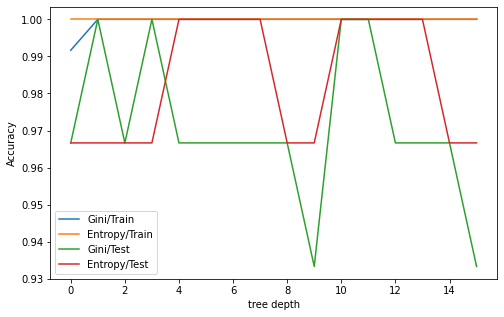

In [ ]:
# Gini와 Entropy, 그리고 tree depth에 따른 정확도를 비교한다.
plt.figure(figsize=(8,5))
plt.plot(trainGini, label = "Gini/Train")
plt.plot(trainEntropy, label = "Entropy/Train")
plt.plot(testGini, label = "Gini/Test")
plt.plot(testEntropy, label = "Entropy/Test")
plt.legend()
plt.xlabel("tree depth")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# feature별 중요도를 파악한다.
feat_impo = dt.feature_importances_
feat_name = list(iris['feature_names'])
print(feat_impo)
print(feat_name)

[0.02900713 0.01105509 0.63119732 0.32874046]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
np.sort(feat_name)
# np.sort(feat_name)[::-1] # 내림차순
# np.argsort(feat_name)
# np.argsort(feat_name)[::-1]

array(['petal length (cm)', 'petal width (cm)', 'sepal length (cm)',
       'sepal width (cm)'], dtype='<U17')

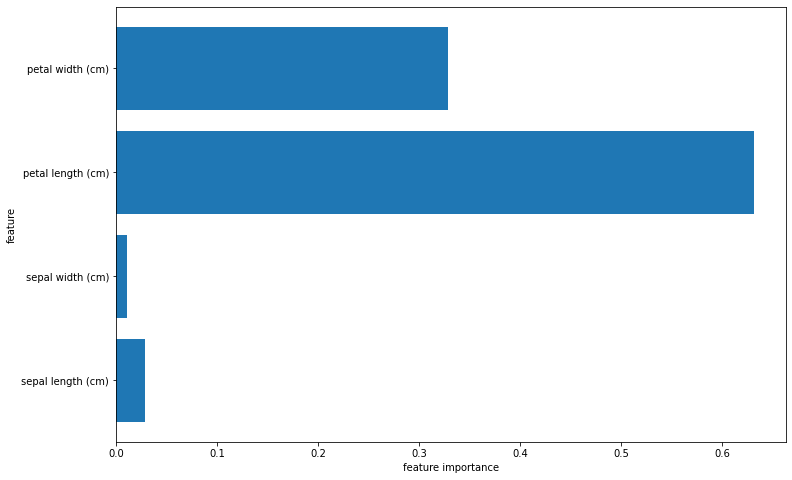

In [ ]:
# 중요도가 높은 feture 5개를 확인한다.

idx = np.argsort(feat_impo)[::-1][:5] 
plt.figure(figsize=(12, 8))
x_idx = np.arange(len(feat_name))
plt.barh(x_idx, feat_impo, align = 'center')
plt.yticks(x_idx, feat_name)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.show()

In [ ]:
print(idx)

[2 3 0 1]
